In [1]:
import cv2
import numpy as np


import sys
import os
def create_dataset_with_adjust_brightness(brightness=0, base="NEU-DET"):
    # mkdir
    name = f"{base}_BilateralBlur_{brightness}"
    path = os.path.join('/Data4/student_zhihan_data/data', name)
    if not os.path.exists(path):
        os.mkdir(path)
        # create train, val, test directory
        os.mkdir(os.path.join(path, 'train'))
        os.mkdir(os.path.join(path, 'valid'))
        os.mkdir(os.path.join(path, 'test'))
        # copy images
        os.system(f"cp -r /Data4/student_zhihan_data/data/{base}/train/* {path}/train")
        os.system(f"cp -r /Data4/student_zhihan_data/data/{base}/valid/* {path}/valid")
        os.system(f"cp -r /Data4/student_zhihan_data/data/{base}/test/* {path}/test")
        # copy configure file
        os.system(f"cp /Data4/student_zhihan_data/data/{base}/data.yaml {path}")

    # adjust brightness of images in train, val, test directory
    for dir in ['train', 'valid', 'test']:
        for img in os.listdir(os.path.join(path, dir, "images")):
            img_path = os.path.join(path, dir, "images", img)
            img = cv2.imread(img_path)
            img = cv2.bilateralFilter(img, brightness, brightness, brightness) 
            cv2.imwrite(img_path, img)

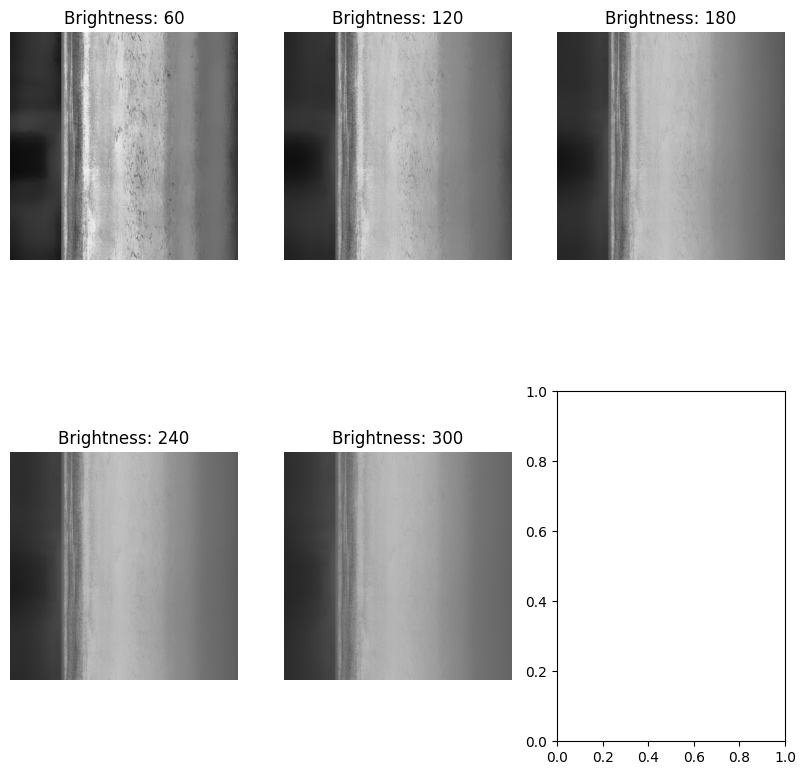

In [3]:
from matplotlib import pyplot as plt
img = cv2.imread('/Data4/student_zhihan_data/data/GC10-DET/test/images/img_01_425005700_00197_jpg.rf.88277838f2a5680138fe9a9bbe00d2a9.jpg')
figs, axies = plt.subplots(2,3, figsize=(10, 10))
ax = axies.flatten()
for idx, id in enumerate(range(2,12,2)):
    ax[idx].imshow(cv2.bilateralFilter(img, id * 30, id * 30, id * 30))
    ax[idx].axis('off')
    ax[idx].set_title(f'Brightness: {id * 30}')
plt.show()

In [ ]:
for i in range(4,12,2):
    create_dataset_with_adjust_brightness(brightness=i * 30, base="GC10-DET")